# The Bankloans dataset

**Students**: Daria Dobrego,  Irina Makarkina, Natalya Vlasova, Danil Markov

**Setup**: In this IGA you are asked to work with the *bankloans.xlsx* file (see the case-study discussion from the lecture). Each group works with its own indicator of **default on loans**. 

+ Group 3: othdebt

Split the values of your indicator into **two** groups: one with **default = 0** and the other with **default = 1**.
Use the **5% level of significance** for statistical inference.


In [20]:
# [load the necessary libraries here]
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

from statsmodels.graphics.gofplots import qqplot

In [25]:
# [import the data here]
df_bankloans = pd.read_excel('bankloans.xlsx', index_col=None, na_values=['NA']) #read dataset 
bankloans = pd.DataFrame(df_bankloans, columns = ['default', 'othdebt']) #create dataset consisting of two needed columns
# create separate variables
default0 = pd.Series(bankloans.query('default==0')['othdebt'])
default1 = pd.Series(bankloans.query('default==1')['othdebt'])

# look at first several rows in the data-frame
bankloans.head(n=5)

,default,othdebt
0,1,5.01
1,0,4.00
2,0,2.17
3,0,0.82
4,1,3.06


### Task 1.

In the chunk below, give a brief economic explanation (no more than 100 words) on the expected influence of your indicator on the **default** variable.

We expect that existence of other debts implies that the chance of default appearance is increasing, therefore, the chance of obtaining the loan is decreasing since if a person have many loans it becomes more difficult for him or her to pay debts. We expect distribution to be left-skewed since while the amount of debts is increasing, the chance of default is increasing as well.

### Task 2. 
+ Construct a histogram for your indicator on the **whole** sample
+ To study its shape, run the appropriate skewness and normality tests.
+ Make specific conclusions.

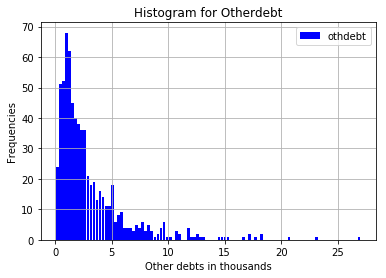

In [41]:
# [give your commands here]
othdebt = pd.DataFrame(bankloans, columns = ['othdebt']) #create subsample consisting of variable "other debt"
othdebt.plot.hist(bankloans, grid=True, bins=100, rwidth=0.9, color='blue')

plt.title('Histogram for ' + "Otherdebt")
plt.xlabel('Other debts in thousands')
plt.ylabel('Frequencies')
plt.show()

In [50]:
othdebt.shape

(700, 1)

In [55]:
# a best way to do the same is to make a simple function
coefSK, pvSK = stats.skewtest(othdebt)
    
print("H0: Sk =  0")
print("Skewness test statistic = ", np.round(coefSK,3))
print("Skewness p-value = ", np.round(pvSK,5))


H0: Sk =  0
Skewness test statistic =  [17.237]
Skewness p-value =  [0.]


P-value is less than 0,05, thus, we reject the null hypothesis.
Conclusion: distribution is not symmetric. Right-skewness can be observed. Most people in the dataset have loans of small value.

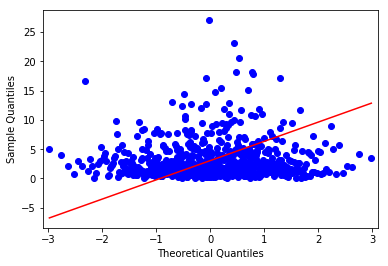

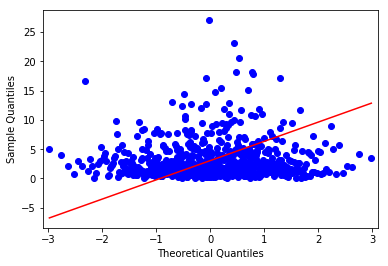

In [56]:
# constructing a Q-Q plot
qqplot(othdebt, line='s')

In [94]:
def myNpVals(x):
    NpVals = pd.Series()

    _, NpVals['DAgostino'] = stats.normaltest(x)
    _, NpVals['Shapiro-Wilk'] = stats.shapiro(x)
    
    print('p-values for {0} data points:'.format(len(x)))
    print(NpVals)

In [95]:
myNpVals(othdebt)

p-values for 700 data points:
DAgostino       [8.617734237997158e-95]
Shapiro-Wilk                2.05702e-32
dtype: object


P-values of both tests are less than 0,05. Thus, we reject the null hypothesis. 
Conclusion: Distribution is not normal. 

### Task 3.

+ By running the appropriate statistical test, compare the mean values of the **two** groups.
+ Draw conclusions on *potential* usefulness of your indicator for explaining the probability of default on a loan. 

In [77]:
# two-sample means comparison for default = 0 or 1 - we have two groups
t_twodefault, pVal_twodefault = stats.ttest_ind(default0, default1)

print("Two-sample t-statistic = ", round(t_twodefault,3))
print("Two-sample p-value = ", round(pVal_twodefault,3))

Two-sample t-statistic =  -3.894
Two-sample p-value =  0.0


In [98]:
#p-value is less that 0,05. Thus, we reject the null hypothesis.

In [101]:
default0.describe()

count    517.000000
mean       2.773211
std        2.813982
min        0.050000
25%        0.990000
50%        1.880000
75%        3.440000
max       18.270000
Name: othdebt, dtype: float64

In [102]:
default1.describe()

count    183.000000
mean       3.863388
std        4.263394
min        0.160000
25%        1.320000
50%        2.530000
75%        4.650000
max       27.030000
Name: othdebt, dtype: float64


Conclusion: Populations (distributions) have different expected values. 

Usefullness: the person might have great credit scoring, however, he might already have taken a few loans in the nearest time. Even if the person has good loan history, at the current time he might be a risky client. Our indicator helps to show total loan value he or she has now.
Differences in mean values in our samples show that people who experience default on average have higer debts.